# You Already Know About Supervised Learning
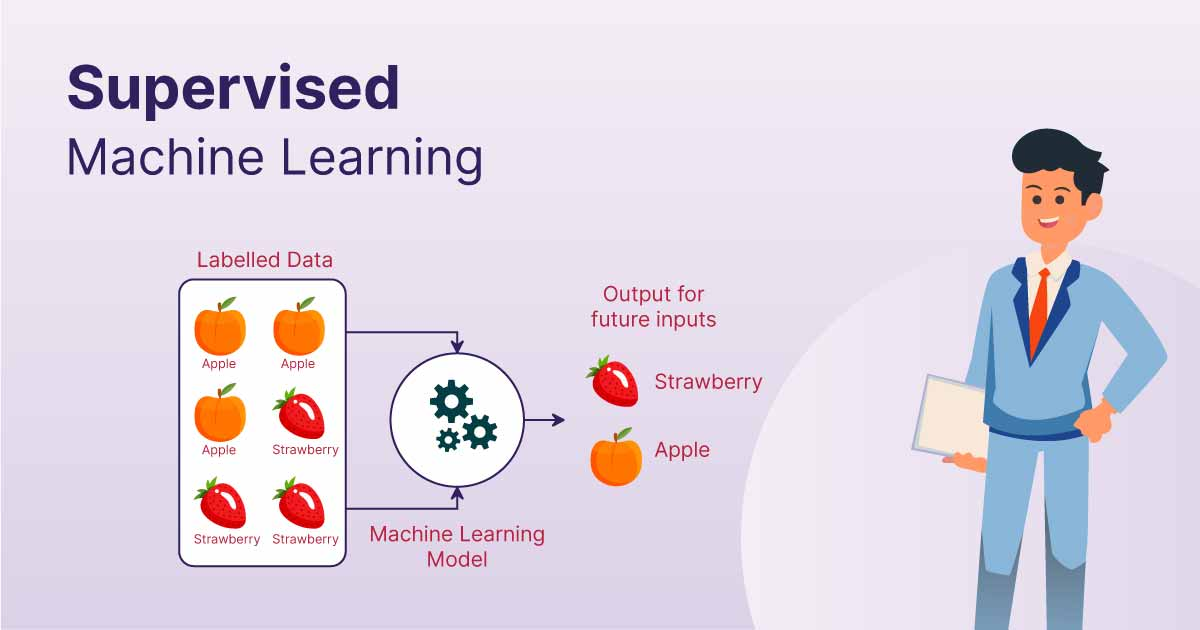

# What Is Unsupervised Learning
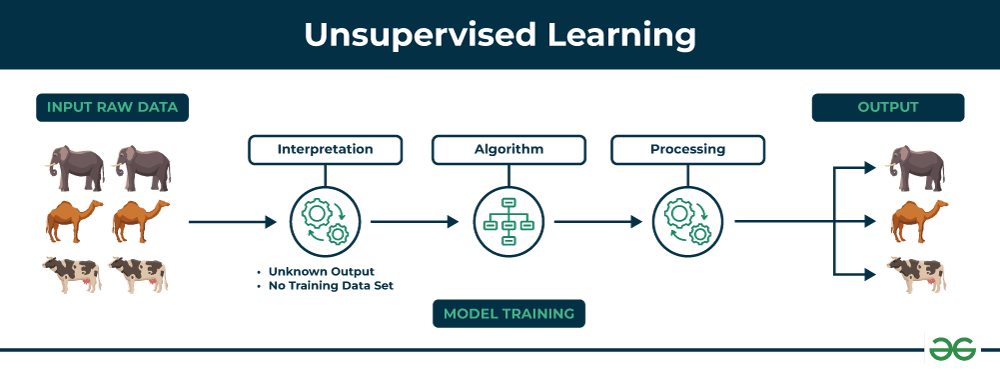

# USE CASES OF UNSUPERVISED LEARNING

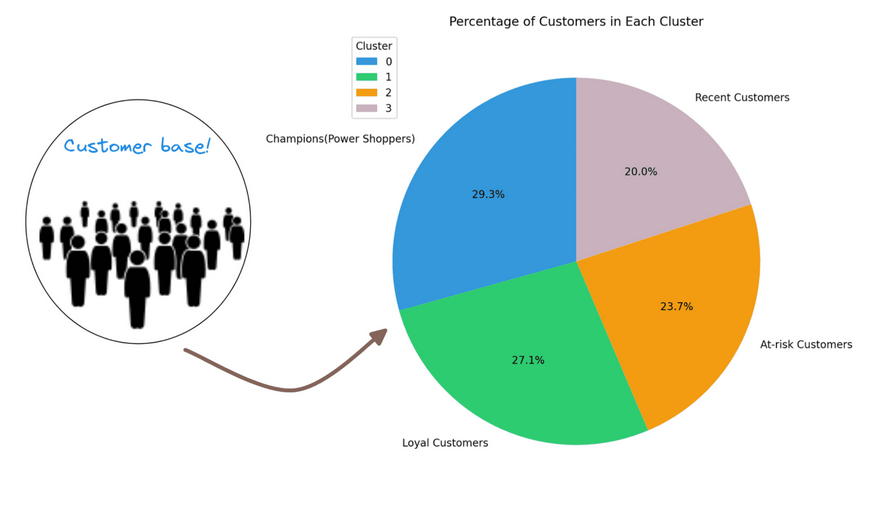



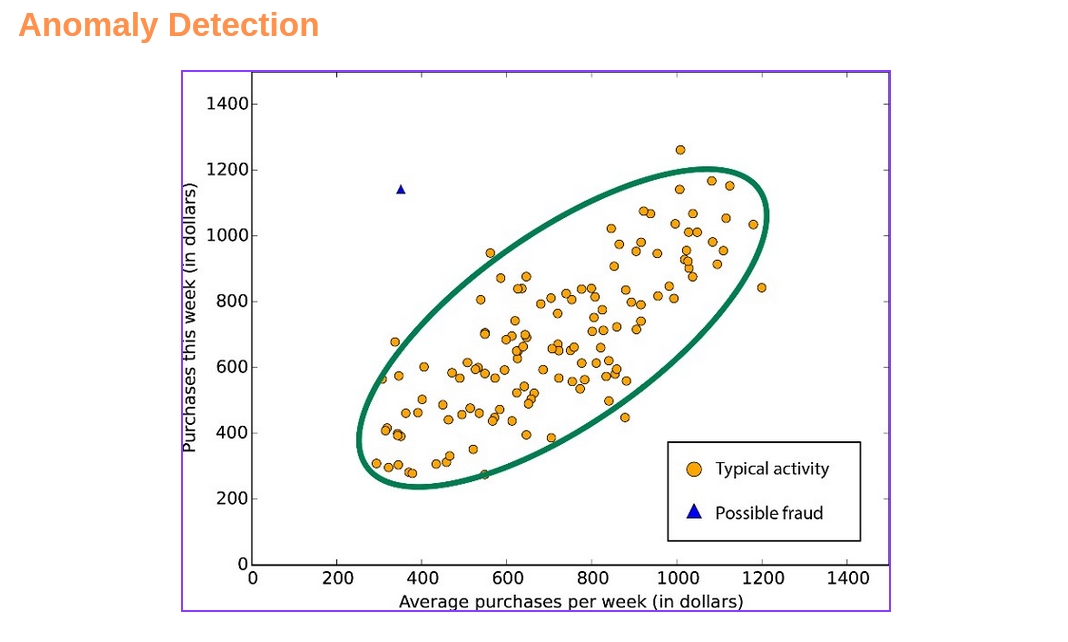


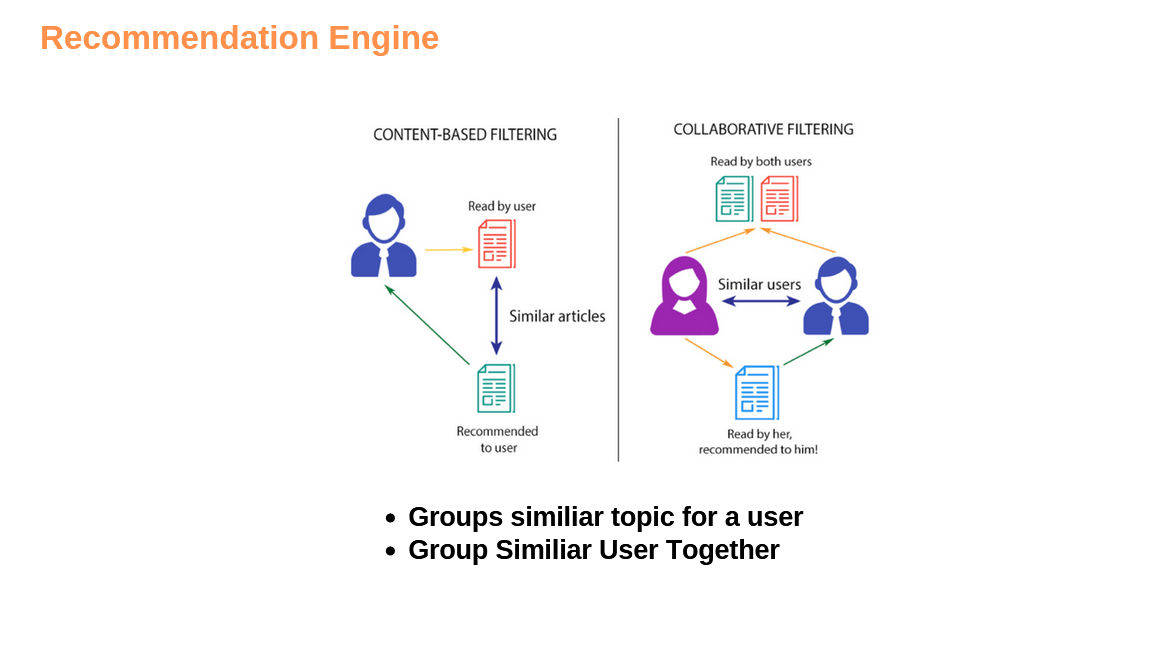

# 📊 Introduction to K‑Means Clustering & PCA

### 📚 Theory: What is K-Means Clustering?

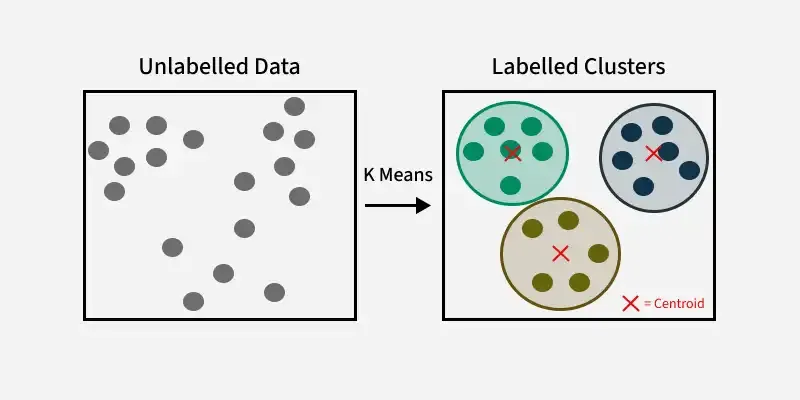



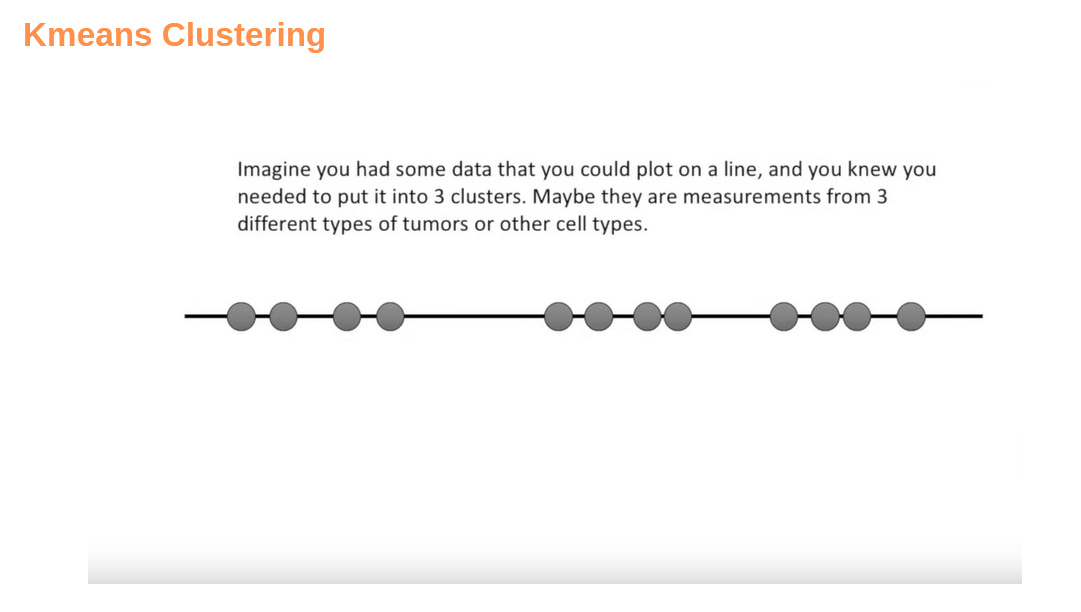


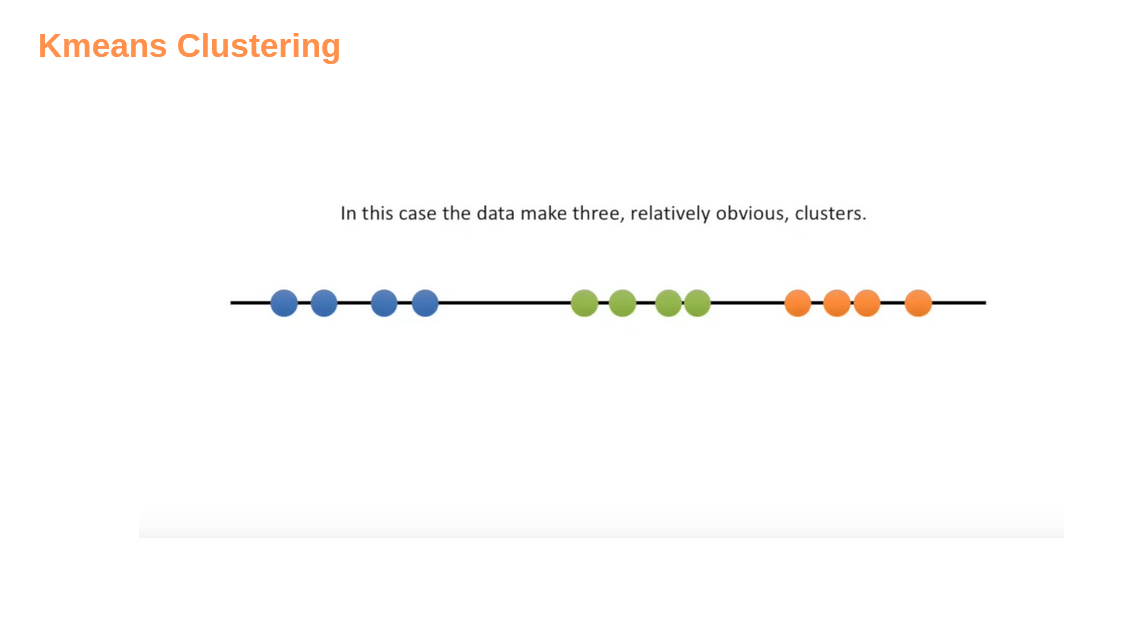


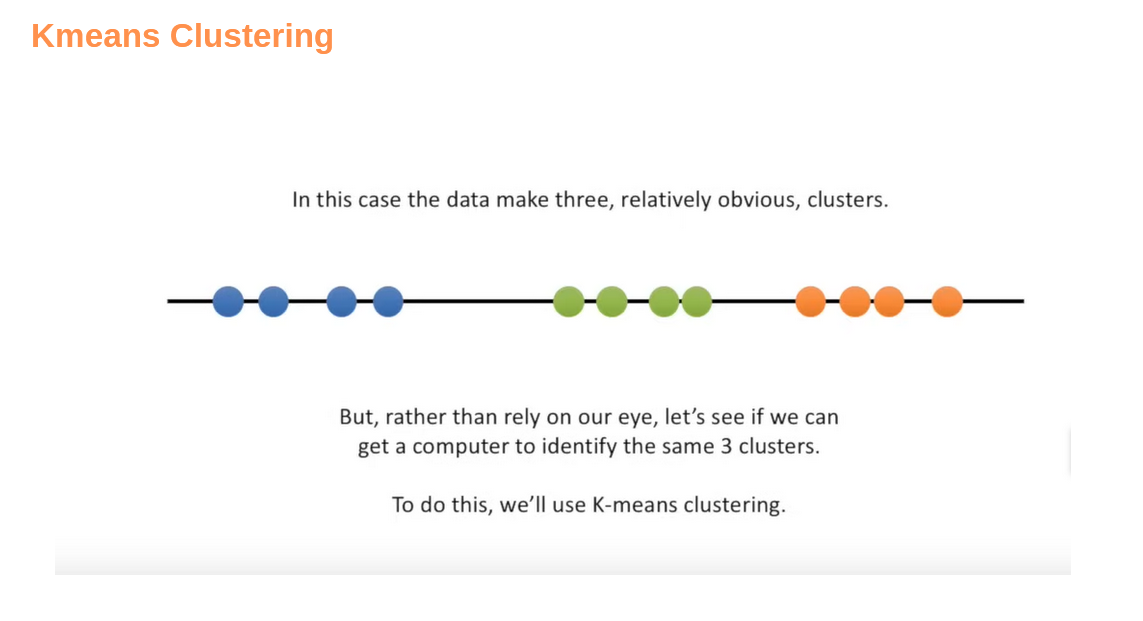


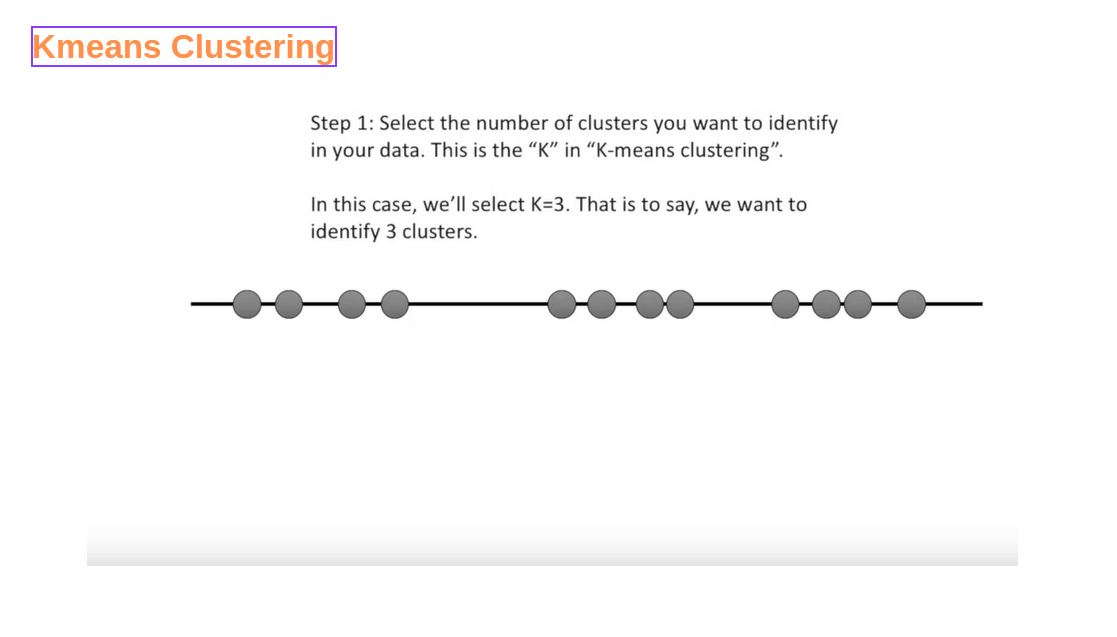

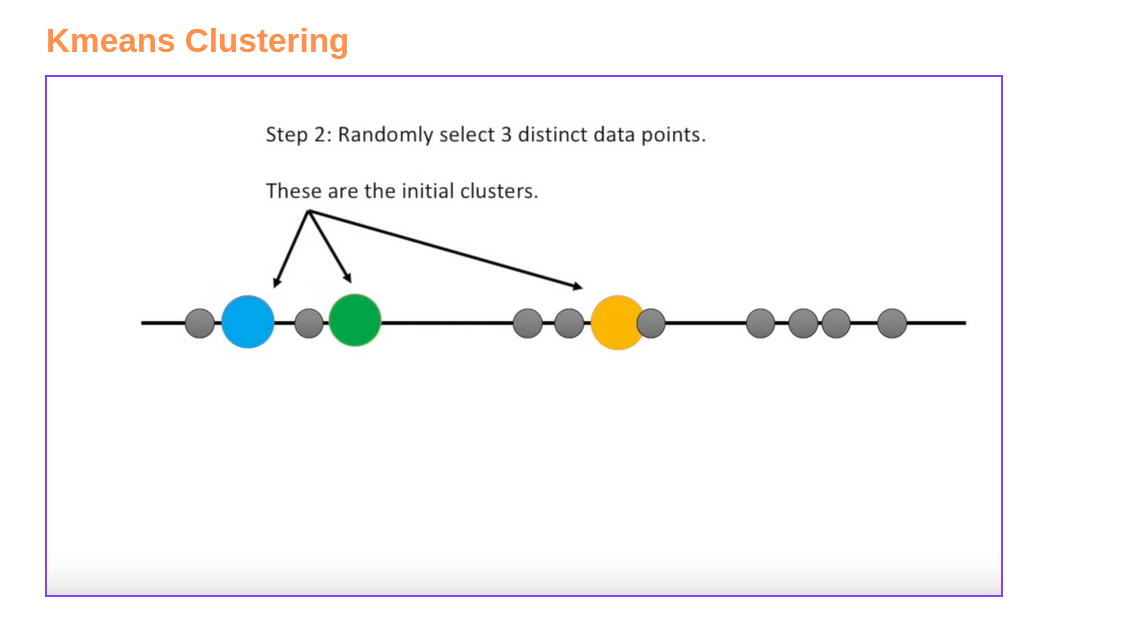

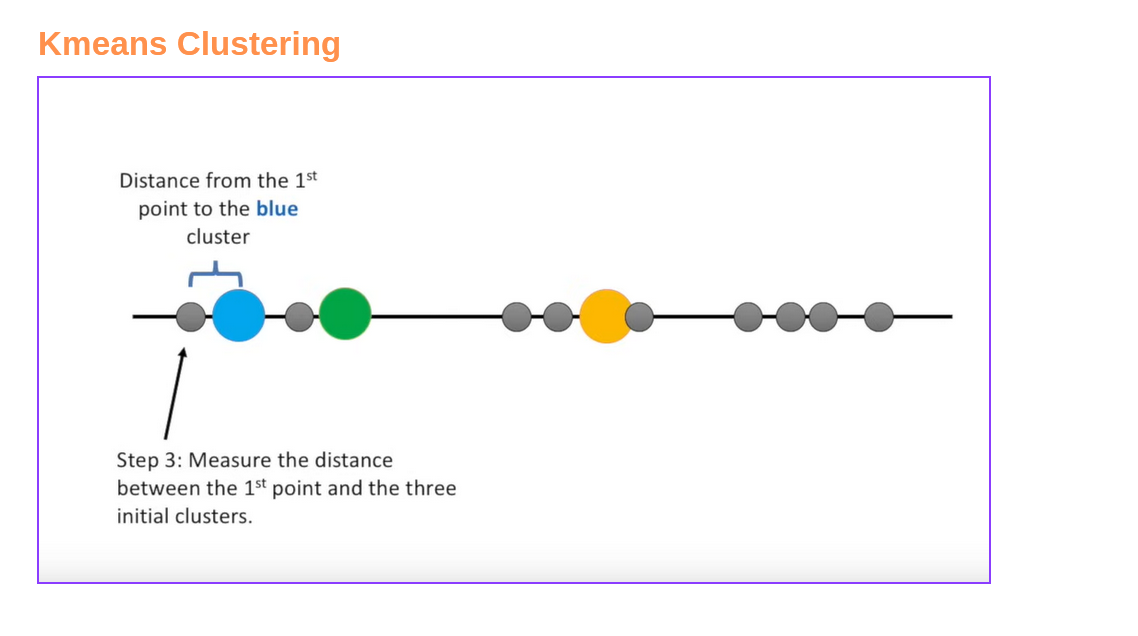

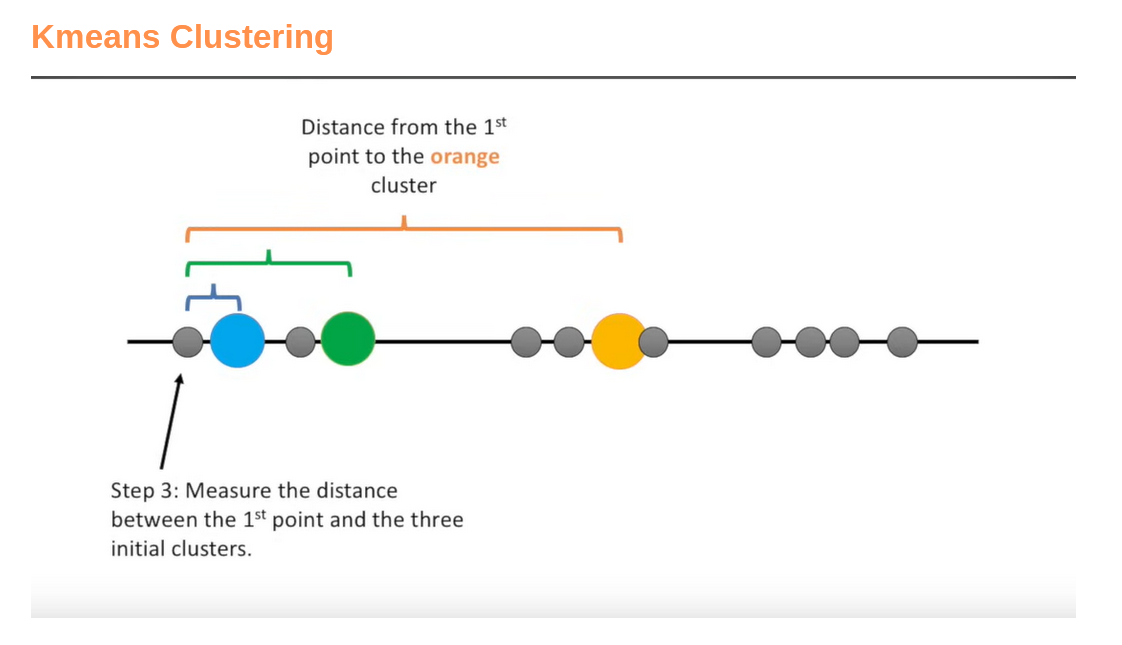

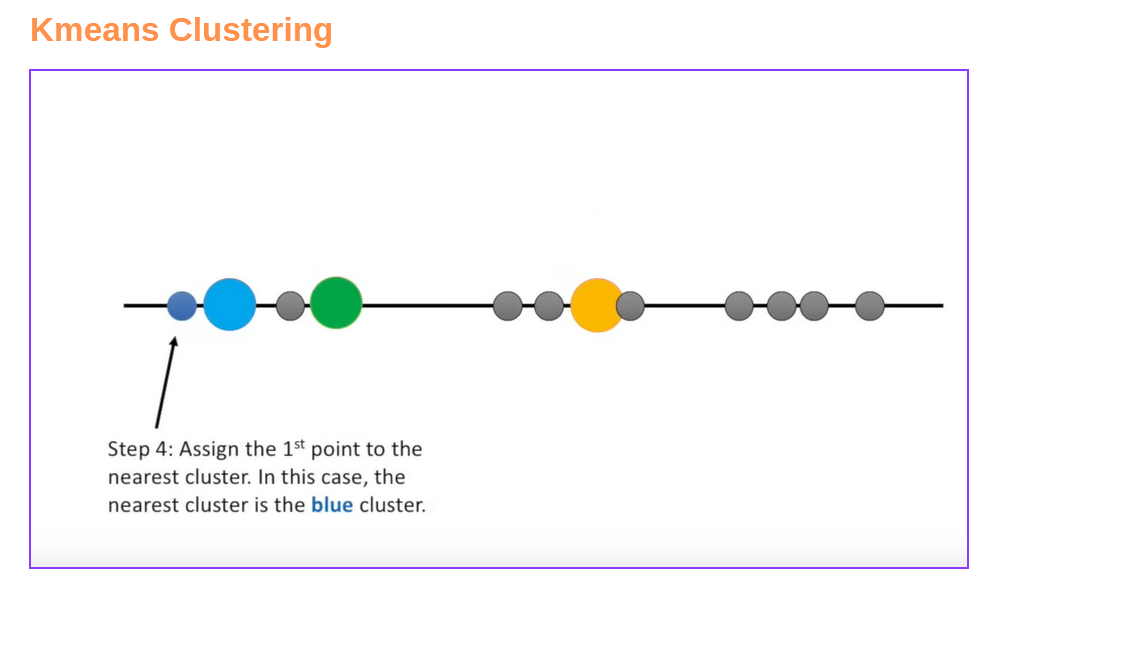

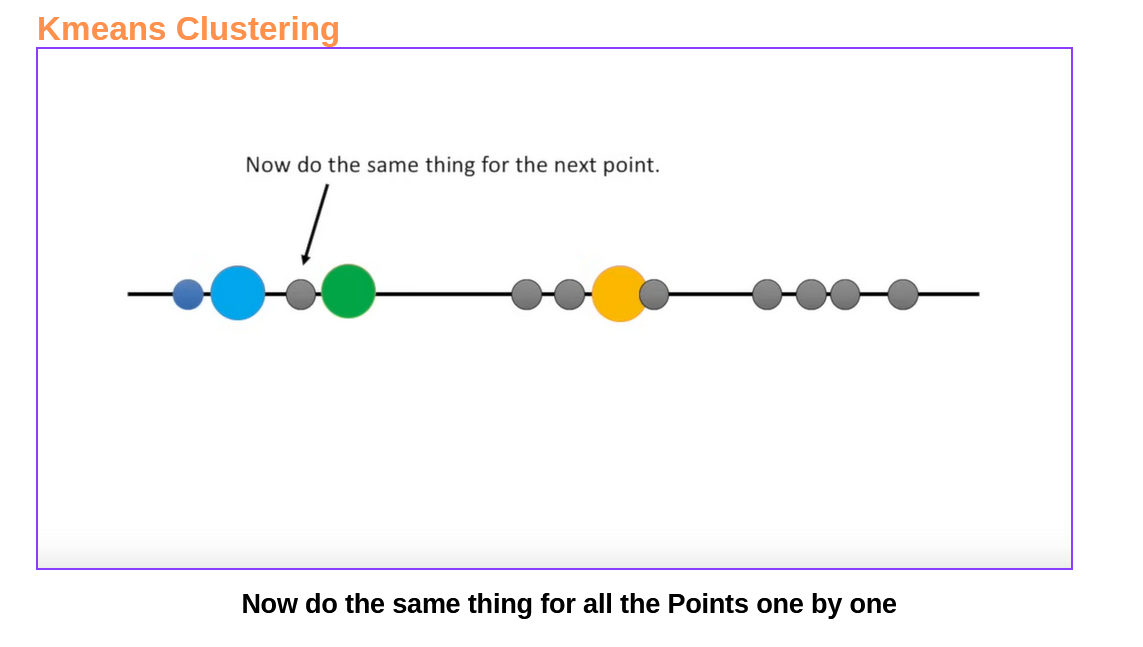


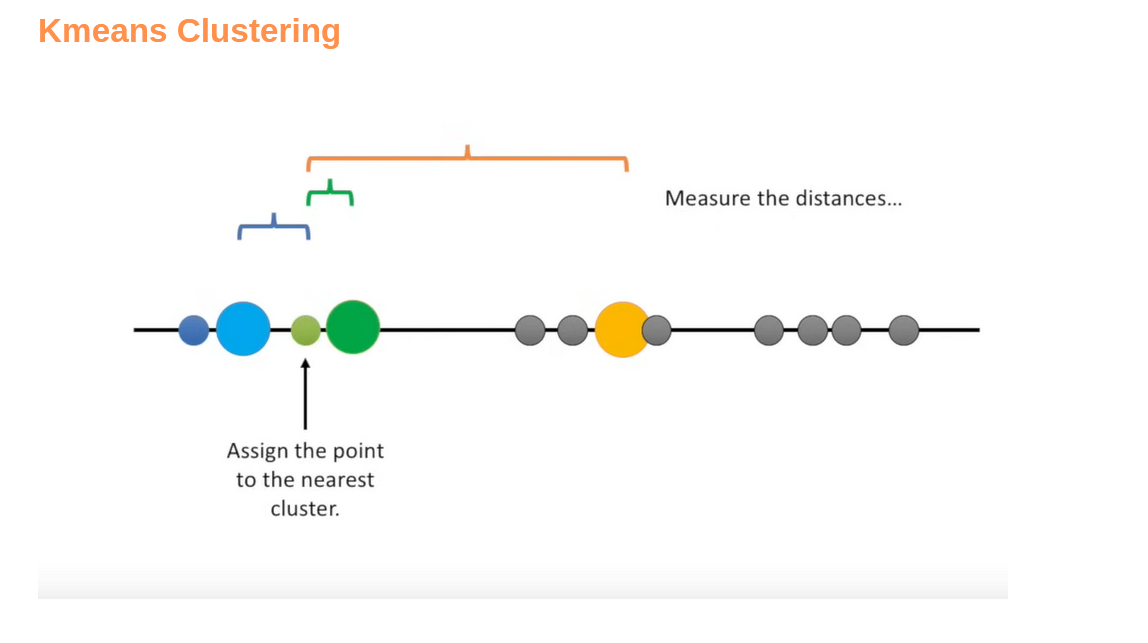


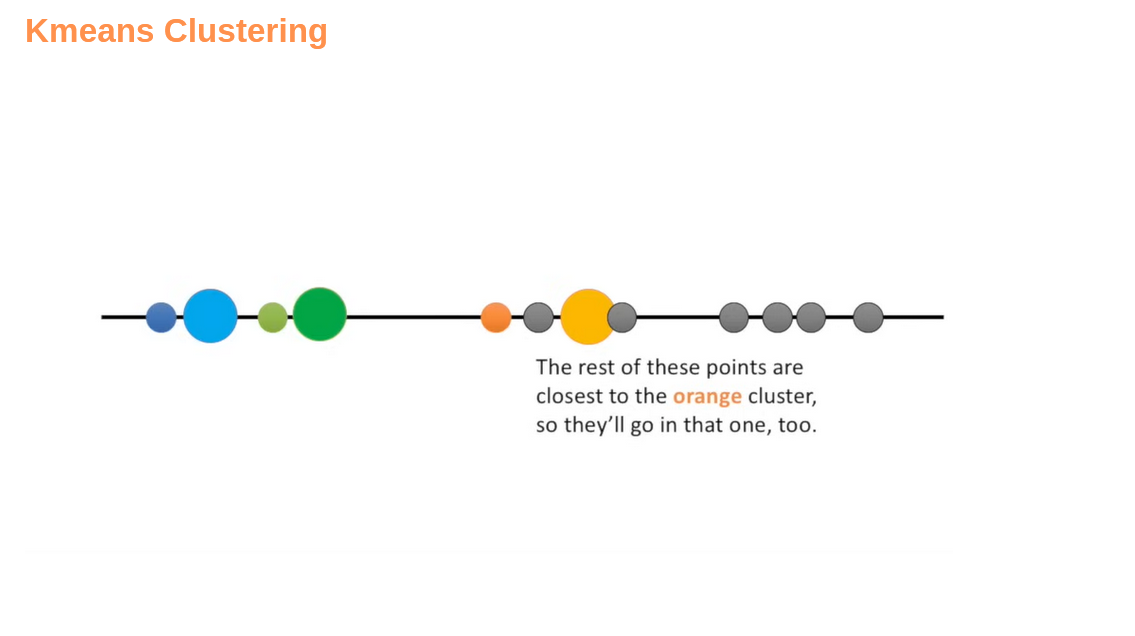

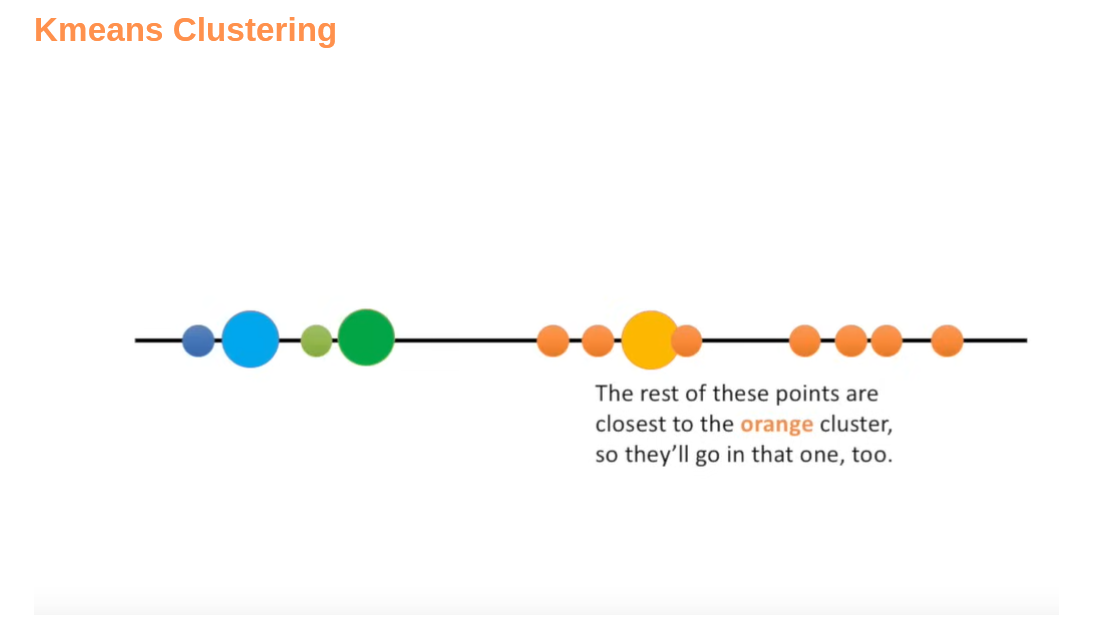

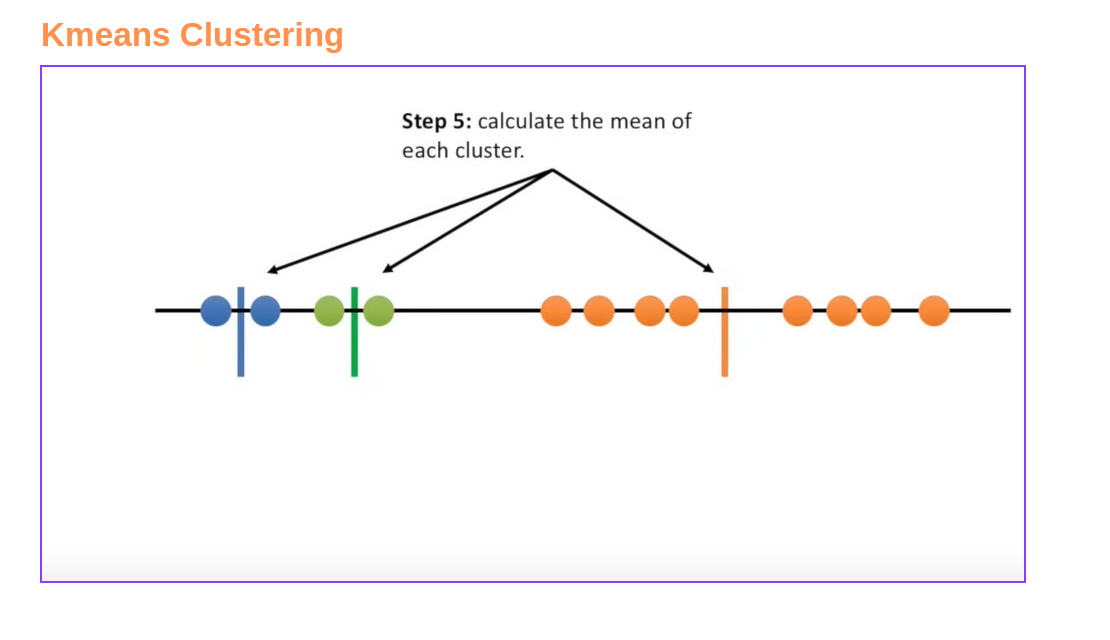

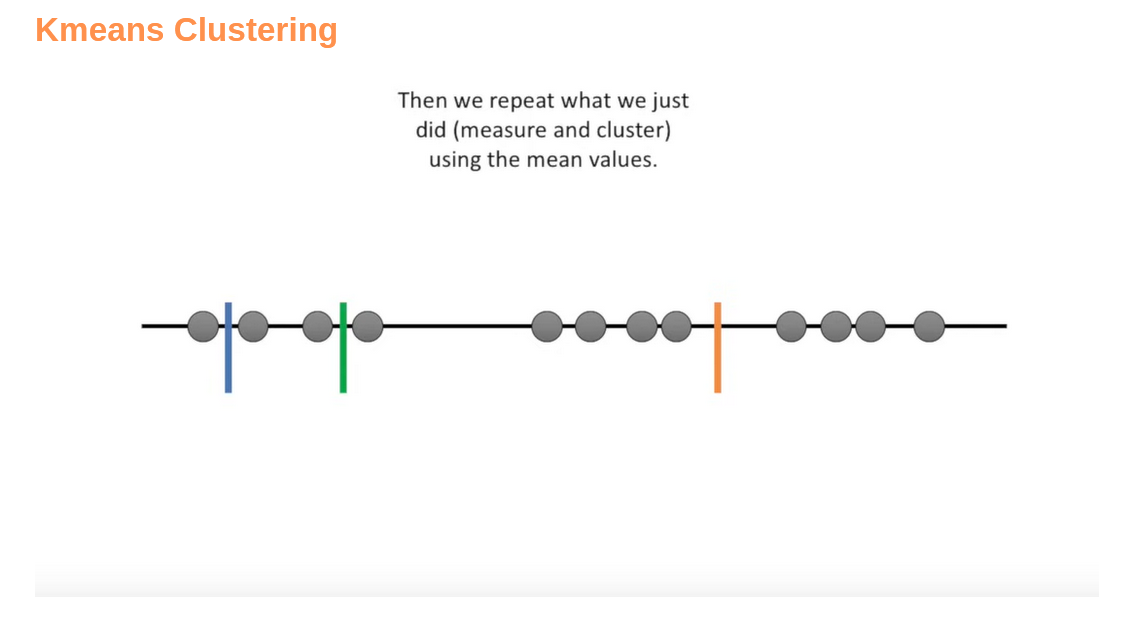


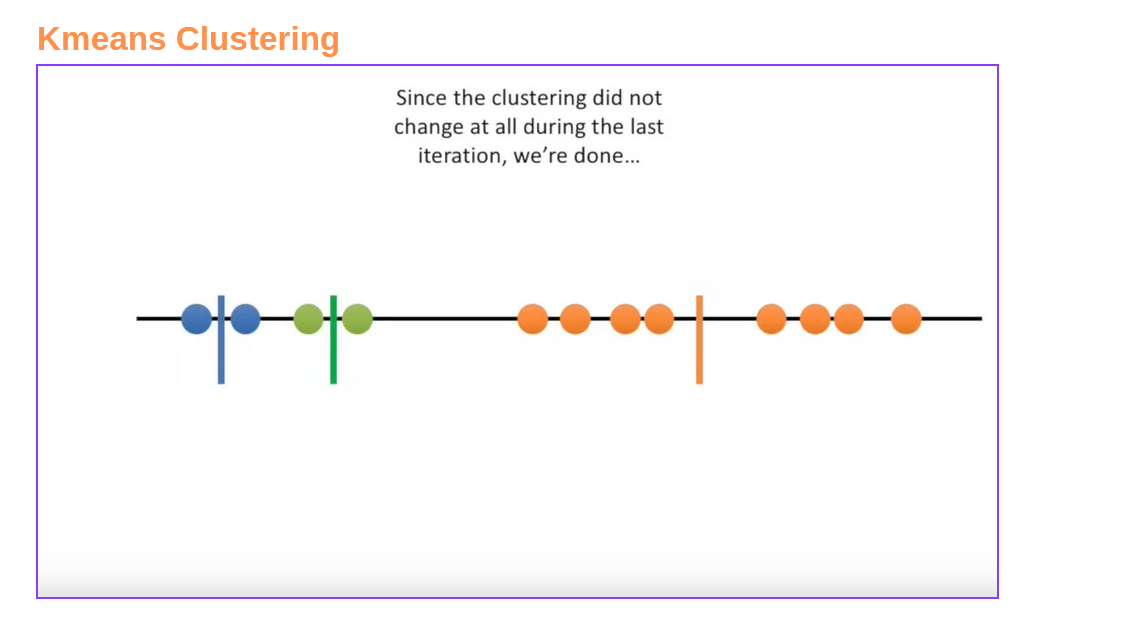
## K-Means is an **unsupervised learning** algorithm used to group similar data points into **K clusters**.
## It works by:
## 1. Choosing K random points as initial cluster centroids.
##  2. Assigning each point to the nearest centroid.
## 3. Updating centroids based on the mean of points in each cluster.
## 4. Repeating steps 2–3 until centroids don’t change much.
## It helps us find structure in unlabeled data.

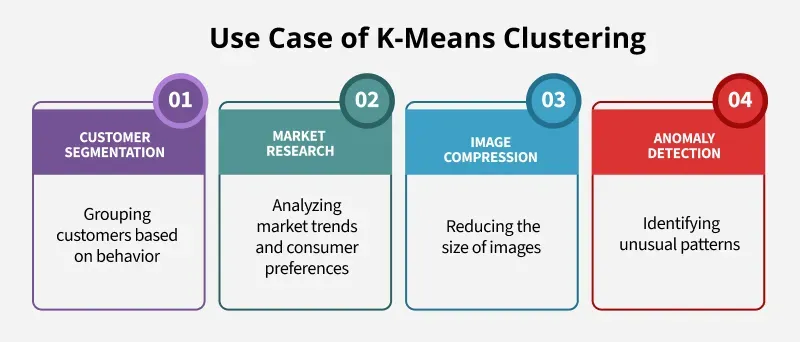


In [ ]:

# 1. Load libraries & data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [ ]:
# Load dataset

df = pd.read_xl("/content/Mall_Customers.xls")
df.head()

AttributeError: module 'pandas' has no attribute 'read_xlsx'

In [ ]:
# 2. Basic EDA (Exploratory Data Analysis)
print("Dataset Info:")
df.info()
print("\nSummary Statistics:")
print(df.describe())


In [ ]:
df['Gender'].value_counts()

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


In [ ]:
df.columns

In [ ]:
# Gender distribution
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

In [ ]:
# Age distribution
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

How this plot helps you:

This histogram helps you understand the age demographics of your mall customers at a glance. You can see:

    The most common age groups (where the bars are highest).
    The range of ages among your customers.
    If the age distribution is spread out or concentrated in certain areas.
    Any potential outliers or unusual patterns in age.


The histogram shows that the majority of the mall customers are between the ages of 20 and 50.The distribution appears somewhat skewed towards younger ages.

In [ ]:
# Income vs Spending
sns.scatterplot(x='Annual_Income_(k$)', y='Spending_Score', data=df)
plt.title('Income vs Spending Score')
plt.show()

The scatter plot titled "Income vs Spending Score" shows the relationship between a customer's annual income (in thousand dollars) and their spending score. Here's what we can interpret from the plot:
Observations:

    No Clear Linear Relationship:

        There doesn't appear to be a strong linear correlation between income and spending score.

        Customers with similar income levels have widely varying spending scores.

    Clusters of Customers:

        Low Income, High Spending: Some customers with income around $20k–$40k have very high spending scores.

        Low Income, Low Spending: Others with similar income have very low spending scores.

        Mid Income (~60k): There’s a dense cluster of customers with a wide range of spending behavior (40–60 spending score), suggesting average income individuals with moderate spending.

        High Income, Low/High Spending: Customers earning above $100k show a wide variance in spending—some spend very little, others a lot.

    Possible Segmentation:

        This plot might be useful for customer segmentation (e.g., via clustering techniques like K-Means).

        It suggests at least 4–5 customer behavior groups based on income and spending.

Conclusion:

There is no strong correlation between income and spending score. Instead, the data indicates that customers' spending behavior is not solely dependent on their income, hinting that other factors (e.g., lifestyle, age, marketing influence) may also play a significant role.

In [ ]:
# Fill missing values with the median
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Annual_Income_(k$)'].fillna(df['Annual_Income_(k$)'].median(), inplace=True)
df['Spending_Score'].fillna(df['Spending_Score'].median(), inplace=True)

# Check for missing values again
print("\nMissing Values after filling:")
print(df.isnull().sum())

In [ ]:
# 3. K‑Means basics and grouping similar points
X = df[['Annual_Income_(k$)','Spending_Score']].values
kmeans = KMeans(n_clusters=5, random_state=42) # Added n_init for clarity and to suppress future warnings
clusters = kmeans.fit_predict(X)


# Interpretation: The clusters represent groups of customers with similar spending habits and income levels.

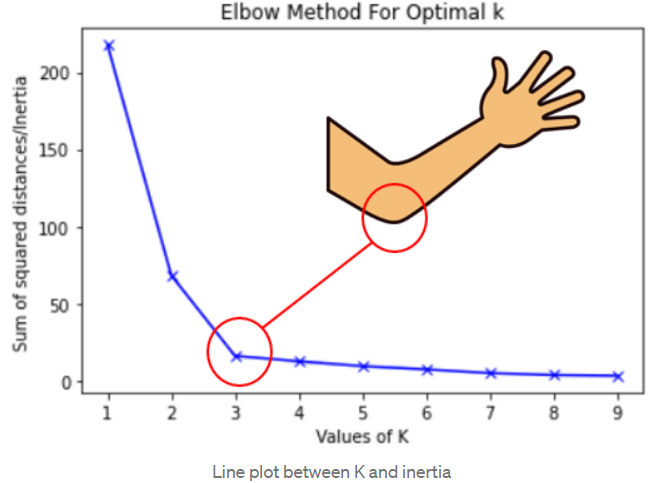

In [ ]:

# 4. Choosing K: The Elbow Method
inertia = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('K')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method For Optimal K')
plt.show()



Interpretation: The "elbow" point is where adding more clusters doesn't improve the result much.


Here, K=5 is the most Optimal Choice

### 📚 Theory: What is PCA (Principal Component Analysis)?
## PCA is a technique for **reducing the number of features** in your data while keeping most of the important patterns.
### It works by:
### 1. Standardizing the data.
### 2. Finding new axes (called principal components) that maximize variance.
### 3. Projecting the data onto these new axes.
### PCA is useful for:
### - Visualizing high-dimensional data.
###- Speeding up models by removing redundant features.

## 🔍 What is PCA?

PCA is a mathematical technique used to:

    Reduce the number of features (columns) in your data

    While still preserving as much useful information as possible

## 🧠 Why use PCA?
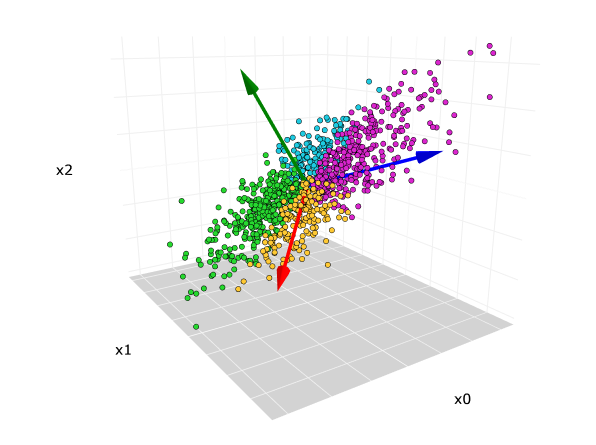

    Simplify data (e.g. reduce 100 columns to 2 or 3)

    Visualize complex data in 2D or 3D

    Speed up machine learning algorithms by removing redundancy

### 📦 How PCA Works (Step-by-Step)

Let’s say your dataset has 3 features:

    Age

    Annual_Income_(k$)

    Spending_Score

Here’s what PCA does:

    Standardize the data
    -So all features have similar scales (done using StandardScaler()).

    Find new axes (directions)
    -These new axes are called principal components.
    -They are directions in space that capture the maximum variance --(differences) in the data.

    Keep the top components
    -We keep only the top 2 or 3 principal components — the ones that explain the most.

In [ ]:
# 5. Introduction to PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Age','Annual_Income_(k$)','Spending_Score']])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratios:", pca.explained_variance_ratio_)



This means:

- **PC1** explains **43.8%** of the total variance (patterns) in the dataset.
- **PC2** explains **33.4%** of the variance.

✅ Together, they capture **77.2%** of the important structure in the data.

This helps us reduce from 3 dimensions (Age, Income, Score) to 2 principal components **while keeping most of the useful information**.


In [ ]:
X_pca[:5]

In [ ]:
# 6. Interpreting principal components
print(pd.DataFrame(pca.components_, columns=['Age','Annual_Income_(k$)','Spending_Score'], index=['PC1','PC2']))

### 🔍 Interpreting PCA Components

#### 🔹 PC1: `[0.7073 * Age] + [0.0386 * Income] + [-0.7058 * Score]`
- Strong **positive** weight for **Age**
- Strong **negative** weight for **Spending Score**
- Very little influence from **Income**

🧠 **Interpretation**: PC1 contrasts **Age** and **Spending Score**:
- Older customers with **lower scores** are on one side
- Younger customers with **higher scores** are on the other

#### 🔹 PC2: `[0.0119 * Age] + [0.9977 * Income] + [0.0665 * Score]`
- Very **strong weight** for **Annual Income**
- Very weak weights for Age and Score

🧠 **Interpretation**: PC2 mostly captures **Annual Income** — it represents variation along the income axis, almost ignoring other features.



### ⚙️ How PCA Works Under the Hood

1. **Standardization**: We scale all features to have mean = 0 and standard deviation = 1.
2. **Covariance Matrix**: PCA computes how features vary together using a matrix of covariances.
3. **Eigen Decomposition**: It finds the **eigenvectors** (new directions) and **eigenvalues** (how much variation each direction captures).
4. **Ranking Components**: PCA sorts these directions by how much variance they explain — top ones are chosen.
5. **Projection**: The original data is projected onto these top directions (principal components), reducing dimensionality.

🔢 **So how do we get numbers like 0.7073 or 0.0386?**
These numbers come from the **eigenvectors** of the covariance matrix. Each eigenvector shows the direction of a principal component, and the numbers are how much each feature contributes to that direction.

✅ In short: PCA rotates your data to find the most important directions, and lets you keep just those.

In [ ]:
# PC1 and PC2 are new dimensions that capture the most variation in data.

# 7. Clustering in PCA space & plot
kmeans_pca = KMeans(n_clusters=5, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)

In [ ]:
df['Cluster_PCA'] = clusters_pca

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters_pca, palette='Set2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters in PCA space')
plt.show()

In [ ]:

# 8. PCA vs Clustering: When to use what
from IPython.display import display, Markdown

display(Markdown("""
| Task                   | Use PCA                     | Use Clustering            |
|------------------------|-----------------------------|---------------------------|
| Reduce dimensions      | ✅ Yes                      | ❌ No                     |
| Visualize high‑D data  | ✅ Yes                      | ❌ No                     |
| Summarize variance     | ✅ Yes                      | ❌ No                     |
| Group similar points   | ❌ No                      | ✅ Yes (e.g. K‑Means)     |
| Preprocessing step     | ✅ Yes (before clustering)  | -                         |
"""))


# ✅ Summary
# - K‑Means groups points into clusters based on distance to centroids.
# - Use the Elbow Method to choose the best K.
# - PCA helps reduce data dimensions while keeping important info.
# - Combining PCA + Clustering improves visualization and grouping.
